In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
axis = pd.read_csv("AXISBANK.csv")
axis.info()
axis_bank = axis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Prev Close  5306 non-null   float64
 2   Open        5306 non-null   float64
 3   High        5306 non-null   float64
 4   Low         5306 non-null   float64
 5   Last        5306 non-null   float64
 6   Close       5306 non-null   float64
 7   VWAP        5306 non-null   float64
 8   Volume      5306 non-null   int64  
 9   Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 414.7+ KB


In [3]:
axis

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,03-01-2000,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11
1,04-01-2000,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387280e+11
2,05-01-2000,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11
3,06-01-2000,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11
4,07-01-2000,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11
...,...,...,...,...,...,...,...,...,...,...
5301,26-04-2021,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15
5302,27-04-2021,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15
5303,28-04-2021,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794630e+15
5304,29-04-2021,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15


In [4]:
axis
num_columns = axis.shape[1]
num_rows = axis.shape[0]
percentage_train = 0.8
train_data_len = int(percentage_train*num_rows)
axis_bank = axis_bank.drop('Date', axis = 1)
col_list = axis_bank.columns.to_list()
x_col_index_array = [col_list.index('Open'),col_list.index('High'),col_list.index('Low'),
                   col_list.index('Close'), col_list.index('Volume')]
y_col_index_array = [col_list.index('Open'),col_list.index('High'),col_list.index('Low'), col_list.index('Close')]
past_data_supply = 7 
#amnt of past data for prediction i.e. past 'x' day's data for next day's prediction

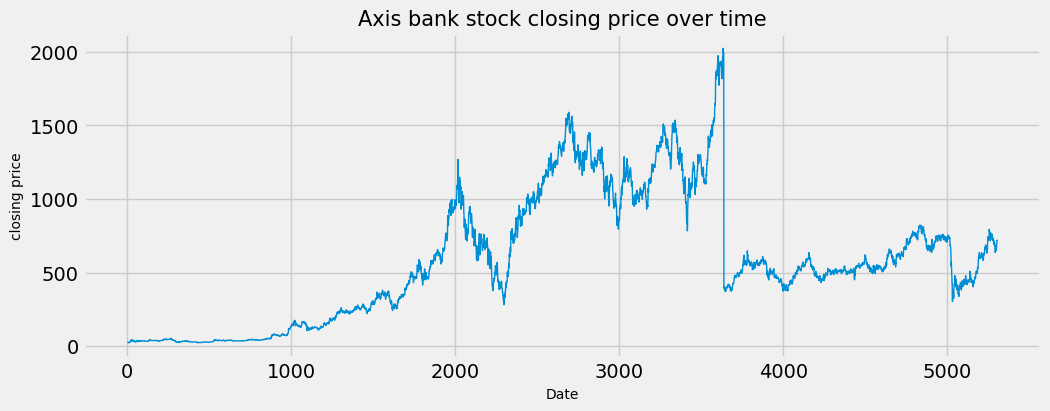

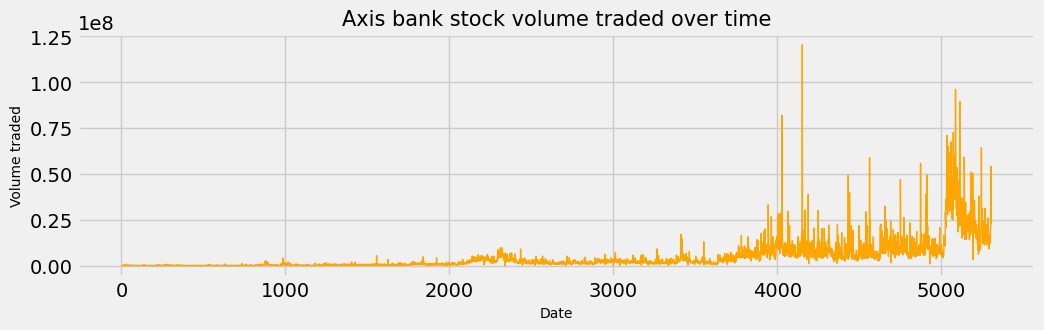

In [5]:
font_dict = {'fontsize': 15}
plt.figure(figsize=(11,4))
plt.plot(axis['Close'],linewidth=1)
plt.title('Axis bank stock closing price over time', fontdict = font_dict)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('closing price', fontsize = 10)

plt.figure(figsize=(11,3))
plt.plot(axis['Volume'], color = 'orange',linewidth=1)
plt.title('Axis bank stock volume traded over time', fontdict = font_dict)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Volume traded', fontsize = 10)
plt.show()


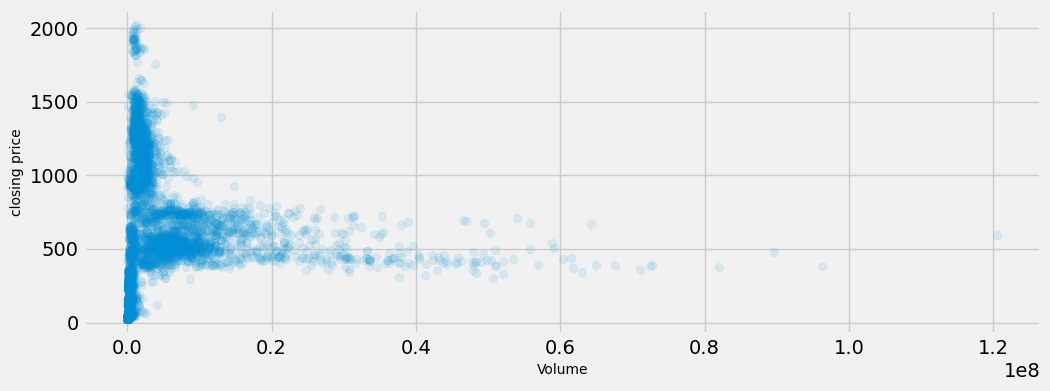

In [6]:
plt.figure(figsize=(11,4))
plt.scatter(axis['Volume'], axis['Close'], alpha = 0.1)
plt.xlabel('Volume', fontsize = 10)
plt.ylabel('closing price',fontsize = 10)

plt.show()

In [7]:
def moving_average(dataframe, days):
    length = len(dataframe)
    average = 0.00;
    ma = np.zeros(length)
    ma[:] = np.nan
    for i in range ( 0,length-days):
        ma[days+i] = np.average(dataframe[i:i+days])
    return ma        

In [8]:
ma_200 = moving_average(axis['Close'], 200)
ma_500 = moving_average(axis['Close'], 500)
ma_800 = moving_average(axis['Close'], 800)
axis['ma_200'] = ma_200
axis['ma_500'] = ma_500
axis['ma_800'] = ma_800

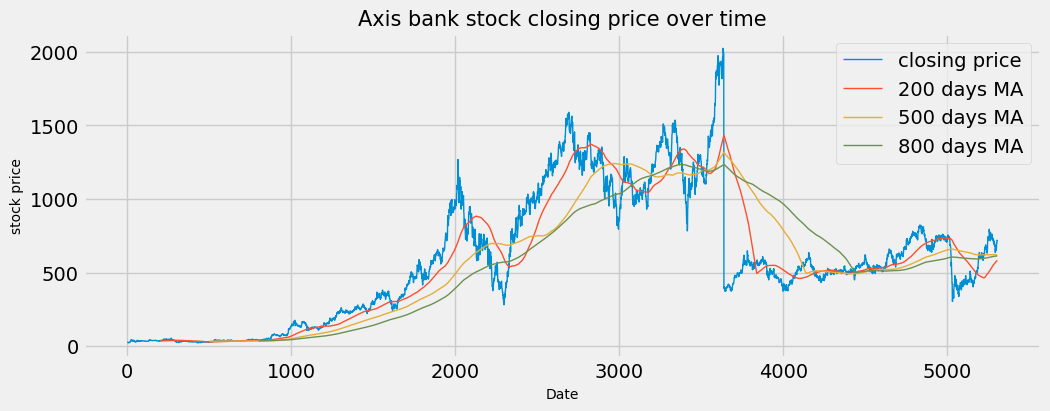

In [9]:
plt.figure(figsize=(11,4))
plt.plot(axis[['Close','ma_200','ma_500','ma_800']],linewidth=1, label = ['closing price', '200 days MA','500 days MA','800 days MA'])
plt.title('Axis bank stock closing price over time', fontdict = font_dict)
plt.legend()
plt.xlabel('Date',fontsize = 10)
plt.ylabel('stock price',fontsize = 10)
plt.show()

<AxesSubplot: >

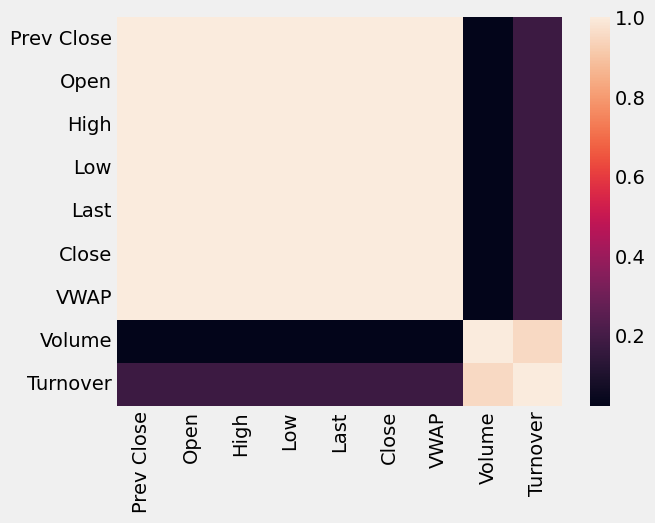

In [10]:
sns.heatmap(axis_bank.corr())

In [11]:
def daily_returns(dataframe):
    dataframe = dataframe['Close']
    percentage_returns = np.zeros(len(dataframe))
    for i in range (1, len(dataframe)):
        percentage_returns[i] = (dataframe[i]/dataframe[i-1] - 1)*100
    percentage_returns[0]= np.nan
    return percentage_returns

axis['Daily Returns'] = daily_returns(axis)

Text(0, 0.5, '% daily return')

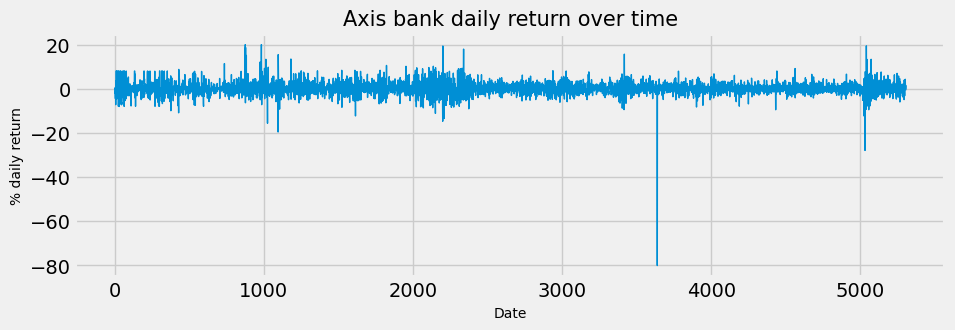

In [12]:
plt.figure(figsize=(10,3))
plt.plot(axis['Daily Returns'],linewidth=1)
plt.title('Axis bank daily return over time', fontdict = font_dict)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('% daily return',fontsize = 10)

In [13]:
axis_bank.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11
1,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387280e+11
2,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11
3,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11
4,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11


In [14]:
def split_and_reshape(np_array):
    length = len(np_array)
    half = int(length/2)
    first_half = np_array[:half]
    second_half = np_array[half:]
    first_half = first_half.reshape(-1).reshape(half,-1)    
    second_half = second_half.reshape(-1).reshape(length-half,-1)
    return np.concatenate((first_half,second_half))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(axis_bank)

##################### train data ######################
traindata = scaled_data[:train_data_len]
xtrain = []
ytrain = []
for i in range (past_data_supply, train_data_len):
    xtrain.append(traindata[i-past_data_supply:i,x_col_index_array])
    ytrain.append(traindata[i, y_col_index_array])
    
xtrain = split_and_reshape(np.array(xtrain))
ytrain = np.array(ytrain)

###################### test data #######################
testdata = scaled_data[train_data_len-past_data_supply:]
xtest = []
ytest = []
for i in range (past_data_supply, len(testdata)):
    xtest.append(testdata[i-past_data_supply:i,x_col_index_array])
    ytest.append(testdata[i, y_col_index_array])
print(xtrain.shape)
xtest = split_and_reshape(np.array(xtest))
ytest = np.array(ytest)


(4237, 35)


In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(len(ytest.transpose())))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(xtrain, ytrain, batch_size=1024, epochs=20)

Epoch 1/20
5/5 [==============================] - 18s 975ms/step - loss: 0.0875
Epoch 2/20
5/5 [==============================] - 5s 990ms/step - loss: 0.0212
Epoch 3/20
5/5 [==============================] - 5s 970ms/step - loss: 0.0101
Epoch 4/20
5/5 [==============================] - 5s 939ms/step - loss: 0.0040
Epoch 5/20
5/5 [==============================] - 5s 937ms/step - loss: 0.0018
Epoch 6/20
5/5 [==============================] - 5s 985ms/step - loss: 0.0014
Epoch 7/20
5/5 [==============================] - 5s 959ms/step - loss: 0.0013
Epoch 8/20
5/5 [==============================] - 5s 943ms/step - loss: 0.0010
Epoch 9/20
5/5 [==============================] - 5s 940ms/step - loss: 6.6588e-04
Epoch 10/20
5/5 [==============================] - 5s 929ms/step - loss: 5.1437e-04
Epoch 11/20
5/5 [==============================] - 5s 956ms/step - loss: 4.8903e-04
Epoch 12/20
5/5 [==============================] - 5s 965ms/step - loss: 4.6479e-04
Epoch 13/20
5/5 [===============

In [47]:
# Get the models predicted price values 
predictions = model.predict(xtest)
# predictions = scaler.inverse_transform(predictions)
# predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
rmse

34/34 [==============================] - 4s 39ms/step


0.032951438769482436

In [48]:
scaled_data[num_rows - len(ytest):num_rows, y_col_index_array] = predictions
predictions = scaler.inverse_transform(scaled_data)

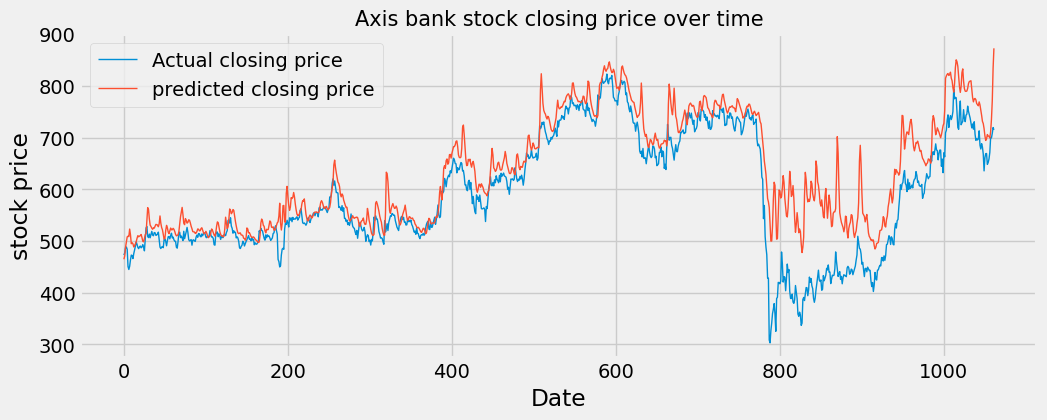

In [49]:
plt.figure(figsize=(11,4))
final_graph = ['ytest','predictions']
plt.plot(axis['Close'].to_numpy()[num_rows - len(ytest):num_rows] ,linewidth=1, label = 'Actual closing price')
plt.plot(predictions[num_rows - len(ytest):num_rows, col_list.index('Close')] ,linewidth=1, label = 'predicted closing price')
plt.title('Axis bank stock closing price over time', fontdict = font_dict)
plt.legend()
plt.xlabel('Date')
plt.ylabel('stock price')
plt.show()

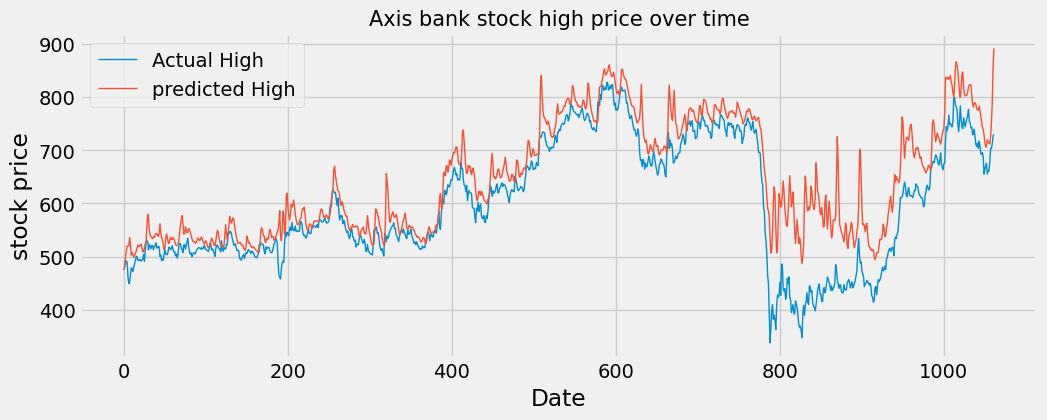

In [50]:
plt.figure(figsize=(11,4))
final_graph = ['ytest','predictions']
plt.plot(axis['High'].to_numpy()[num_rows - len(ytest):num_rows] ,linewidth=1,label = 'Actual High')
plt.plot(predictions[num_rows - len(ytest):num_rows, col_list.index('High')] ,linewidth=1,label = 'predicted High')
plt.title('Axis bank stock high price over time', fontdict = font_dict)
plt.legend()
plt.xlabel('Date')
plt.ylabel('stock price')
plt.show()

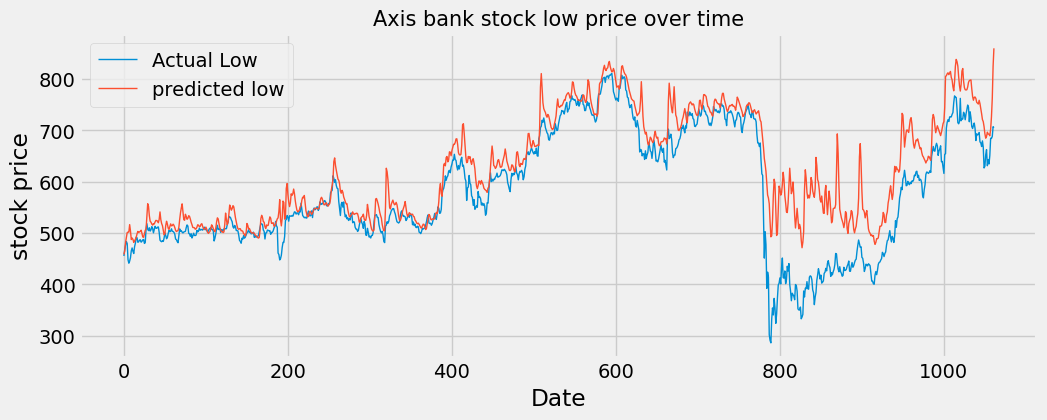

In [51]:
plt.figure(figsize=(11,4))
final_graph = ['ytest','predictions']
plt.plot(axis['Low'].to_numpy()[num_rows - len(ytest):num_rows] ,linewidth=1,label = 'Actual Low')
plt.plot(predictions[num_rows - len(ytest):num_rows, col_list.index('Low')] ,linewidth=1,label = 'predicted low')
plt.title('Axis bank stock low price over time', fontdict = font_dict)
plt.legend()
plt.xlabel('Date')
plt.ylabel('stock price')
plt.show()

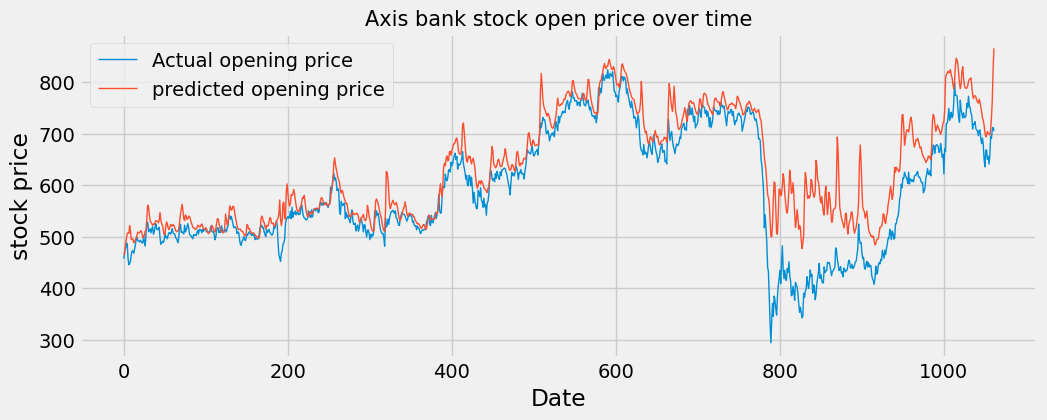

In [52]:
plt.figure(figsize=(11,4))
final_graph = ['ytest','predictions']
plt.plot(axis['Open'].to_numpy()[num_rows - len(ytest):num_rows] ,linewidth=1,label = 'Actual opening price')
plt.plot(predictions[num_rows - len(ytest):num_rows, col_list.index('Open')] ,linewidth=1,label = 'predicted opening price')
plt.title('Axis bank stock open price over time', fontdict = font_dict)
plt.legend()
plt.xlabel('Date')
plt.ylabel('stock price')
plt.show()